**Chapter 1 – The Machine Learning landscape**

_This notebook contains the code examples in chapter 1. You'll also find the exercise solutions at the end of the notebook. The rest of this notebook is used to generate `lifesat.csv` from the original data sources, and some of this chapter's figures._

You're welcome to go through the code in this notebook if you want, but the real action starts in the next chapter.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/01_the_machine_learning_landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/01_the_machine_learning_landscape.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

This project requires Python 3.7 or above:

In [1]:
import sys
import numpy as np

assert sys.version_info >= (3, 7)
print("numpy version: ", np.__version__)

#ok

numpy version:  2.1.3


Scikit-Learn ≥1.0.1 is required:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
assert version.parse(np.__version__) >= version.parse("1.0") ##added

# ok

Let's define the default font sizes, to plot pretty figures:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## additional params - figure, lines
plt.rc('figure', figsize=(8,6), dpi=100)
plt.rc('lines', linewidth=2, linestyle='--', marker='o')

Make this notebook's output stable across runs:

In [4]:
import numpy as np

np.random.seed(42)

# Code example 1-1

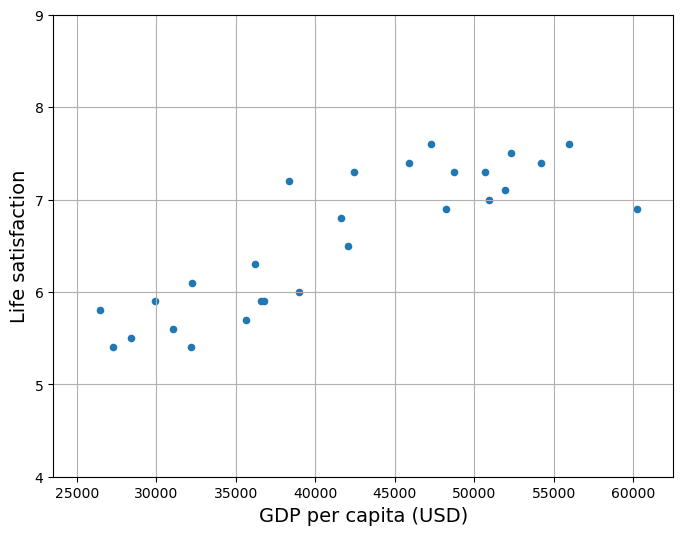

[[6.30165767]]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]

Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two
lines:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

with these two:

```python
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
```

In [6]:
# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
print(model.predict(X_new)) # outputs [[6.33333333]]


[[6.33333333]]


# Generating the data and figures — please skip

This is the code I used to generate the `lifesat.csv` dataset. You can safely skip this.

Create a function to save the figures:

In [7]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load and prepare Life satisfaction data

To create `lifesat.csv`, I downloaded the Better Life Index (BLI) data from [OECD's website](http://stats.oecd.org/index.aspx?DataSetCode=BLI) (to get the Life Satisfaction for each country), and World Bank GDP per capita data from [OurWorldInData.org](https://ourworldindata.org/grapher/gdp-per-capita-worldbank). The BLI data is in `datasets/lifesat/oecd_bli.csv` (data from 2020), and the GDP per capita data is in `datasets/lifesat/gdp_per_capita.csv` (data up to 2020).

If you want to grab the latest versions, please feel free to do so. However, there may be some changes (e.g., in the column names, or different countries missing data), so be prepared to have to tweak the code.

In [8]:
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [9]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

Preprocess the GDP per capita data to keep only the year 2020:

In [10]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


Preprocess the OECD BLI data to keep only the `Life satisfaction` column:

In [11]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


Now let's merge the life satisfaction data and the GDP per capita data, keeping only the GDP per capita and Life satisfaction columns:

In [12]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


To illustrate the risk of overfitting, I use only part of the data in most figures (all countries with a GDP per capita between `min_gdp` and `max_gdp`). Later in the chapter I reveal the missing countries, and show that they don't follow the same linear trend at all.

In [13]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [14]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

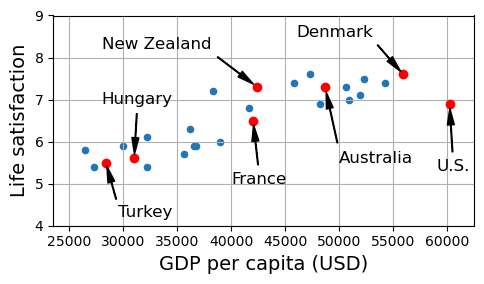

In [ ]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('money_happy_scatterplot')
plt.show()

#todo - check with different color and shape e.g. ro

In [16]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


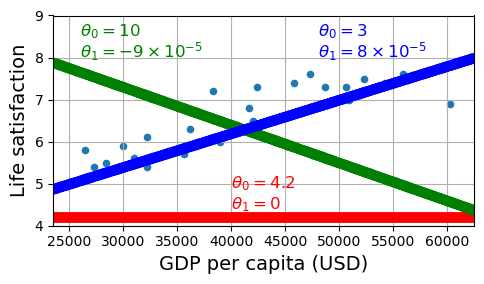

In [17]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('tweaking_model_params_plot')
plt.show()

In [ ]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

In [ ]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('best_fit_model_plot')
plt.show()

In [ ]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

In [ ]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

In [ ]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [ ]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

In [ ]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

In [ ]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('representative_training_data_scatterplot')
plt.show()

In [ ]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('overfitting_model_plot')
plt.show()

In [ ]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
full_country_stats.loc[w_countries][lifesat_col]

In [ ]:
all_w_countries = [c for c in gdp_per_capita.index if "W" in c.upper()]
gdp_per_capita.loc[all_w_countries].sort_values(by=gdppc_col)

In [ ]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('ridge_model_plot')
plt.show()

# Exercise Solutions

1. Machine Learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.
2. Machine Learning is great for complex problems for which we have no algorithmic solution, to replace long lists of hand-tuned rules, to build systems that adapt to fluctuating environments, and finally to help humans learn (e.g., data mining).
3. A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance.
4. The two most common supervised tasks are regression and classification.
5. Common unsupervised tasks include clustering, visualization, dimensionality reduction, and association rule learning.
6. Reinforcement Learning is likely to perform best if we want a robot to learn to walk in various unknown terrains, since this is typically the type of problem that Reinforcement Learning tackles. It might be possible to express the problem as a supervised or semi-supervised learning problem, but it would be less natural.
7. If you don't know how to define the groups, then you can use a clustering algorithm (unsupervised learning) to segment your customers into clusters of similar customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all your customers into these groups.
8. Spam detection is a typical supervised learning problem: the algorithm is fed many emails along with their labels (spam or not spam).
9. An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.
10. Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer's main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these mini-batches.
11. An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions.
12. A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).
13. Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance's features into the model's prediction function, using the parameter values found by the learning algorithm.
14. Some of the main challenges in Machine Learning are the lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.
15. If a model performs great on the training data but generalizes poorly to new instances, the model is likely overfitting the training data (or we got extremely lucky on the training data). Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data.
16. A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production.
17. A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.
18. The train-dev set is used when there is a risk of mismatch between the training data and the data used in the validation and test datasets (which should always be as close as possible to the data used once the model is in production). The train-dev set is a part of the training set that's held out (the model is not trained on it). The model is trained on the rest of the training set, and evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then the model is likely overfitting the training set. If it performs well on both the training set and the train-dev set, but not on the validation set, then there is probably a significant data mismatch between the training data and the validation + test data, and you should try to improve the training data to make it look more like the validation + test data.
19. If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic (you may launch a model that performs worse than you expect).